In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
path = 'C:/Users/인공지능사관학교/Desktop/핵심역량프로젝트/'
# path = 'C:/Users/HS/Desktop/전력프로젝트/'
seed = 0

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/H2GTRM.TTF' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv(path+'/데이터셋/'+'okm_augumented_2021.csv')

In [4]:
data.describe()

,날짜,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
count,6.168000e+03,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6165.000000,6168.000000,6167.000000,6168.000000,6168.000000,6168.000000,6168.000000,6151.000000,6168.000000
mean,2.021049e+07,12.428016,90.410182,92.695363,95.106355,95.037938,93.424125,467.344682,15.906064,2.063633,70.098735,2.244252,162.757198,4.003891,15.256809,4.770428,0.901336,1.313959
std,2.447756e+02,12.847309,55.349403,57.942122,59.285709,59.347554,57.355938,857.571815,9.160356,1.164118,22.996164,9.613491,30.820855,2.006957,8.799601,2.452431,1.985511,0.241700
min,2.021010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000,8.000000,0.000000,109.800000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2.021031e+07,6.000000,23.000000,23.000000,23.000000,23.000000,23.000000,0.000000,9.600000,1.200000,53.000000,0.000000,167.200000,2.000000,8.000000,3.000000,0.000000,1.000000
50%,2.021051e+07,12.000000,101.000000,104.000000,105.000000,107.000000,104.000000,45.000000,17.400000,1.900000,74.000000,0.000000,167.200000,4.000000,15.000000,5.000000,0.112971,1.500000
75%,2.021071e+07,18.000000,133.000000,143.000000,149.000000,149.000000,144.000000,637.250000,23.300000,2.800000,91.000000,0.100000,191.600000,6.000000,23.000000,7.000000,1.162285,1.500000
max,2.021091e+07,188.000000,207.000000,222.000000,218.000000,214.000000,208.000000,9830.000000,33.400000,7.600000,98.000000,122.400000,191.600000,7.000000,31.000000,9.000000,48.386364,1.500000


In [6]:
data[['15분', '30분', '45분','60분', '평균', '생산량']].describe()

,15분,30분,45분,60분,평균,생산량
count,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000
mean,90.410182,92.695363,95.106355,95.037938,93.424125,467.344682
std,55.349403,57.942122,59.285709,59.347554,57.355938,857.571815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,23.000000,23.000000,23.000000,23.000000,0.000000
50%,101.000000,104.000000,105.000000,107.000000,104.000000,45.000000
75%,133.000000,143.000000,149.000000,149.000000,144.000000,637.250000
max,207.000000,222.000000,218.000000,214.000000,208.000000,9830.000000


In [8]:
data[['기온', '풍속', '습도', '강수량','전기요금(계절)', '공장인원']].describe()

,기온,풍속,습도,강수량,전기요금(계절),공장인원
count,6168.000000,6165.000000,6168.000000,6167.000000,6168.000000,6151.000000
mean,15.906064,2.063633,70.098735,2.244252,162.757198,0.901336
std,9.160356,1.164118,22.996164,9.613491,30.820855,1.985511
min,-12.000000,0.000000,8.000000,0.000000,109.800000,0.000000
25%,9.600000,1.200000,53.000000,0.000000,167.200000,0.000000
50%,17.400000,1.900000,74.000000,0.000000,167.200000,0.112971
75%,23.300000,2.800000,91.000000,0.100000,191.600000,1.162285
max,33.400000,7.600000,98.000000,122.400000,191.600000,48.386364


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        6168 non-null   int64  
 1   시간        6168 non-null   int64  
 2   15분       6168 non-null   int64  
 3   30분       6168 non-null   int64  
 4   45분       6168 non-null   int64  
 5   60분       6168 non-null   int64  
 6   평균        6168 non-null   int64  
 7   생산량       6168 non-null   int64  
 8   기온        6168 non-null   float64
 9   풍속        6165 non-null   float64
 10  습도        6168 non-null   int64  
 11  강수량       6167 non-null   float64
 12  전기요금(계절)  6168 non-null   float64
 13  day       6168 non-null   int64  
 14  d         6168 non-null   int64  
 15  m         6168 non-null   int64  
 16  공장인원      6151 non-null   float64
 17  인건비       6168 non-null   float64
dtypes: float64(6), int64(12)
memory usage: 867.5 KB


In [12]:
for col in ['풍속','강수량','공장인원']:
    data[col].fillna(data[col].describe()['mean'], inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        6168 non-null   int64  
 1   시간        6168 non-null   int64  
 2   15분       6168 non-null   int64  
 3   30분       6168 non-null   int64  
 4   45분       6168 non-null   int64  
 5   60분       6168 non-null   int64  
 6   평균        6168 non-null   int64  
 7   생산량       6168 non-null   int64  
 8   기온        6168 non-null   float64
 9   풍속        6168 non-null   float64
 10  습도        6168 non-null   int64  
 11  강수량       6168 non-null   float64
 12  전기요금(계절)  6168 non-null   float64
 13  day       6168 non-null   int64  
 14  d         6168 non-null   int64  
 15  m         6168 non-null   int64  
 16  공장인원      6168 non-null   float64
 17  인건비       6168 non-null   float64
dtypes: float64(6), int64(12)
memory usage: 867.5 KB


In [19]:
data.columns

Index(['날짜', '시간', '15분', '30분', '45분', '60분', '평균', '생산량', '기온', '풍속', '습도',
       '강수량', '전기요금(계절)', 'day', 'd', 'm', '공장인원', '인건비'],
      dtype='object')

In [20]:
data.head()

,날짜,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
0,20210101,0,62,61,61,61,61,0,-3.2,2.4,71,0.0,109.8,5,1,1,0.0,1.5
1,20210101,1,96,93,116,113,105,0,-4.5,1.5,77,0.0,109.8,5,1,1,0.0,1.5
2,20210101,2,106,96,106,107,104,0,-3.9,2.6,58,0.0,109.8,5,1,1,0.0,1.5
3,20210101,3,92,110,110,109,105,0,-4.1,2.6,56,0.0,109.8,5,1,1,0.0,1.5
4,20210101,4,108,105,106,108,107,0,-4.6,2.6,60,0.0,109.8,5,1,1,0.0,1.5


In [21]:
data.describe()

,날짜,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
count,6.168000e+03,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6165.000000,6168.000000,6167.000000,6168.000000,6168.000000,6168.000000,6168.000000,6151.000000,6168.000000
mean,2.021049e+07,12.428016,90.410182,92.695363,95.106355,95.037938,93.424125,467.344682,15.906064,2.063633,70.098735,2.244252,162.757198,4.003891,15.256809,4.770428,0.901336,1.313959
std,2.447756e+02,12.847309,55.349403,57.942122,59.285709,59.347554,57.355938,857.571815,9.160356,1.164118,22.996164,9.613491,30.820855,2.006957,8.799601,2.452431,1.985511,0.241700
min,2.021010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000,8.000000,0.000000,109.800000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2.021031e+07,6.000000,23.000000,23.000000,23.000000,23.000000,23.000000,0.000000,9.600000,1.200000,53.000000,0.000000,167.200000,2.000000,8.000000,3.000000,0.000000,1.000000
50%,2.021051e+07,12.000000,101.000000,104.000000,105.000000,107.000000,104.000000,45.000000,17.400000,1.900000,74.000000,0.000000,167.200000,4.000000,15.000000,5.000000,0.112971,1.500000
75%,2.021071e+07,18.000000,133.000000,143.000000,149.000000,149.000000,144.000000,637.250000,23.300000,2.800000,91.000000,0.100000,191.600000,6.000000,23.000000,7.000000,1.162285,1.500000
max,2.021091e+07,188.000000,207.000000,222.000000,218.000000,214.000000,208.000000,9830.000000,33.400000,7.600000,98.000000,122.400000,191.600000,7.000000,31.000000,9.000000,48.386364,1.500000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        6168 non-null   int64  
 1   시간        6168 non-null   int64  
 2   15분       6168 non-null   int64  
 3   30분       6168 non-null   int64  
 4   45분       6168 non-null   int64  
 5   60분       6168 non-null   int64  
 6   평균        6168 non-null   int64  
 7   생산량       6168 non-null   int64  
 8   기온        6168 non-null   float64
 9   풍속        6165 non-null   float64
 10  습도        6168 non-null   int64  
 11  강수량       6167 non-null   float64
 12  전기요금(계절)  6168 non-null   float64
 13  day       6168 non-null   int64  
 14  d         6168 non-null   int64  
 15  m         6168 non-null   int64  
 16  공장인원      6151 non-null   float64
 17  인건비       6168 non-null   float64
dtypes: float64(6), int64(12)
memory usage: 867.5 KB


In [23]:
for col in data.columns:
    data[col].fillna(data.describe()[col]['mean'])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        6168 non-null   int64  
 1   시간        6168 non-null   int64  
 2   15분       6168 non-null   int64  
 3   30분       6168 non-null   int64  
 4   45분       6168 non-null   int64  
 5   60분       6168 non-null   int64  
 6   평균        6168 non-null   int64  
 7   생산량       6168 non-null   int64  
 8   기온        6168 non-null   float64
 9   풍속        6165 non-null   float64
 10  습도        6168 non-null   int64  
 11  강수량       6167 non-null   float64
 12  전기요금(계절)  6168 non-null   float64
 13  day       6168 non-null   int64  
 14  d         6168 non-null   int64  
 15  m         6168 non-null   int64  
 16  공장인원      6151 non-null   float64
 17  인건비       6168 non-null   float64
dtypes: float64(6), int64(12)
memory usage: 867.5 KB


## 데이터 탐색
- 각 변수간의 상관계수를 확인하여 해당모델이 유의미한 독립변수들을 가지고 있는지 확인
- 전체 데이터가 주기성을 보이고 있는지 확인

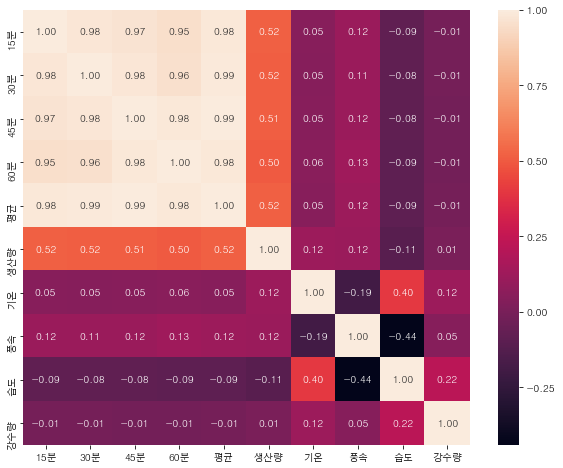

In [23]:
plt.figure(figsize=(10,8))
variable_data = data[['15분', '30분', '45분', '60분', '평균', '생산량', '기온', '풍속', '습도','강수량']]
matrix = variable_data.corr()
labels = variable_data.columns

sns.heatmap(matrix, annot=True, fmt='.2f', annot_kws={'size':10}, xticklabels=labels, yticklabels=labels)
plt.show()

In [6]:
ss = StandardScaler()
data_scaled = ss.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled)
product = data_scaled.iloc[:,7]
electronic = data_scaled.iloc[:,6]
x_line = np.arange(len(data))

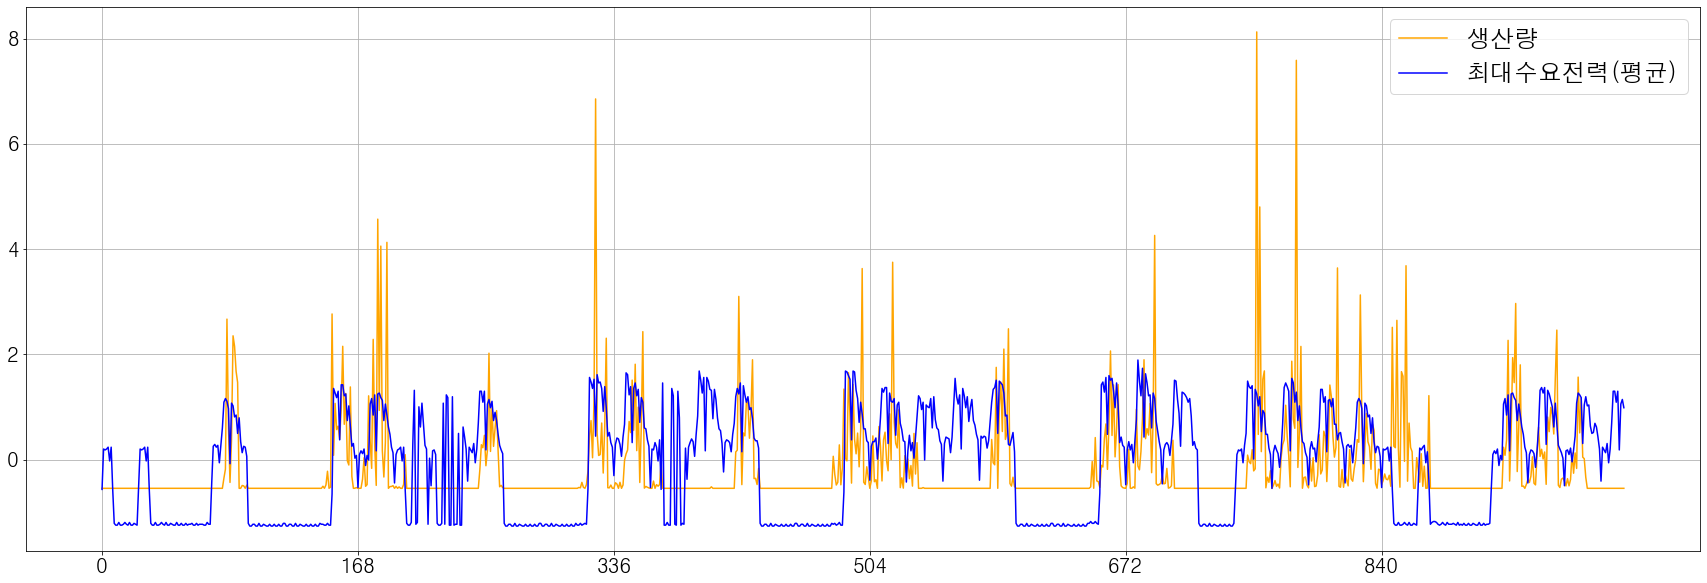

In [24]:
plt.figure(figsize=(30,10))
plt.plot(x_line[:1000], product[:1000], color = 'orange', label='생산량')
plt.plot(x_line[:1000], electronic[:1000], color = 'blue', label='최대수요전력(평균)')

plt.xticks([i for i in range(0,1000,24*7)],fontsize=20)
plt.yticks(fontsize=20)

plt.grid()
plt.legend(fontsize=24, loc=0)
plt.show()

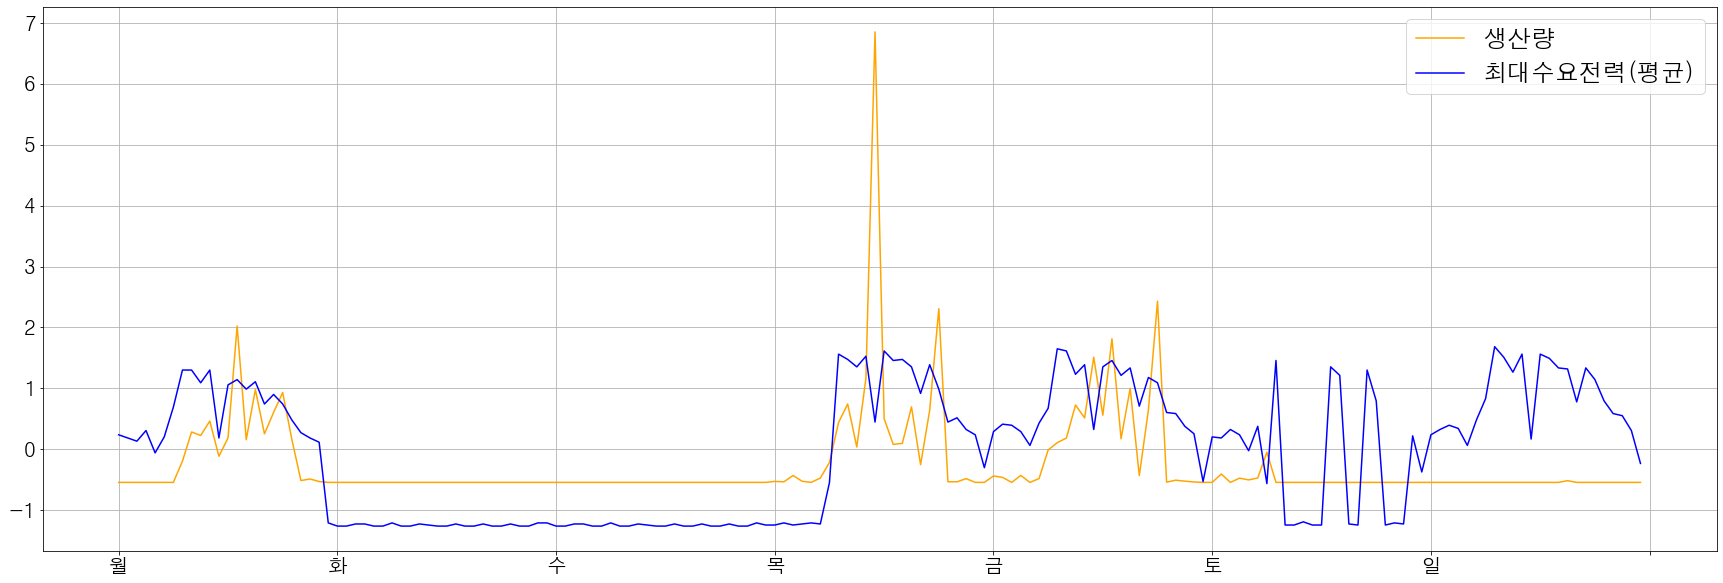

In [26]:
plt.figure(figsize=(30,10))
plt.plot(x_line[241:409], product[241:409], color = 'orange', label='생산량')
plt.plot(x_line[241:409], electronic[241:409], color = 'blue', label='최대수요전력(평균)')

plt.xticks([i for i in range(241,410,24)],['월','화','수','목','금','토','일'], fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.legend(fontsize=24, loc=0)

plt.show()

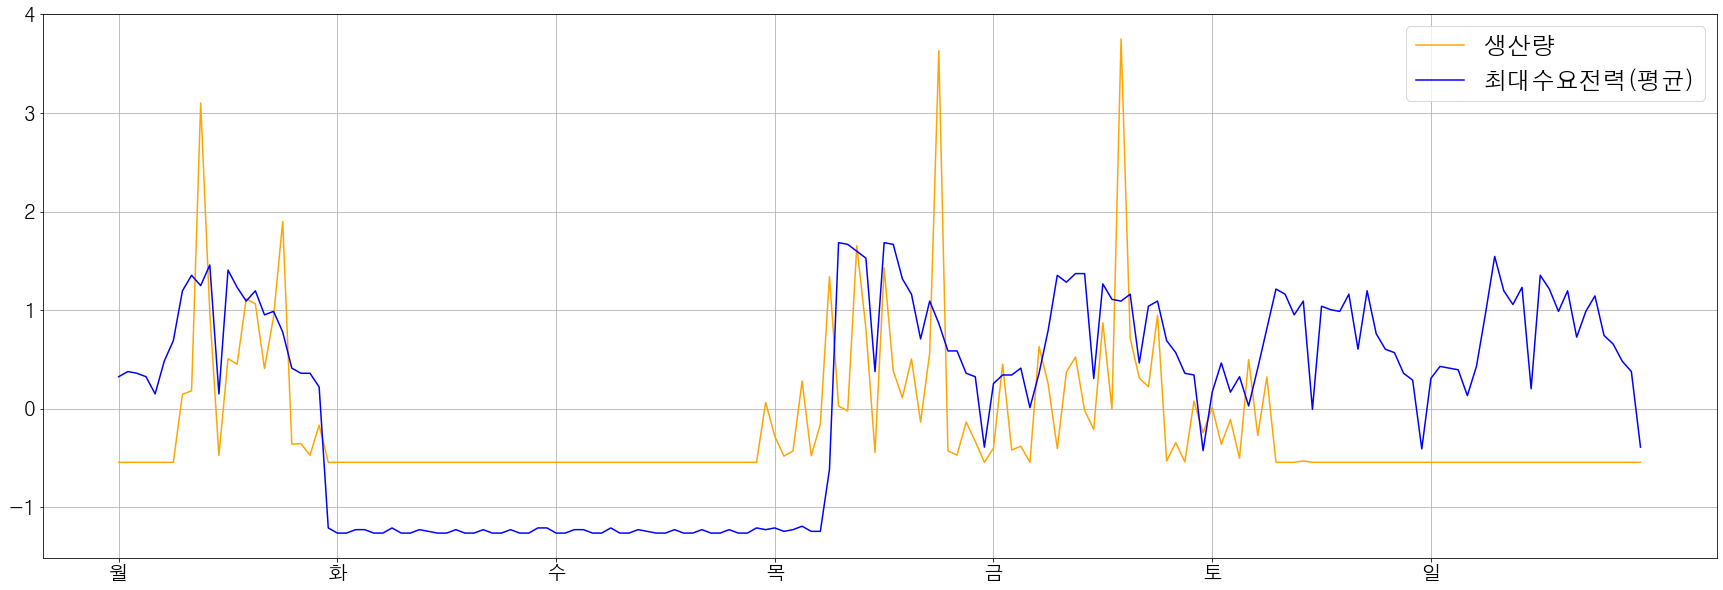

In [25]:
plt.figure(figsize=(30,10))
plt.plot(x_line[409:577], product[409:577], color = 'orange', label='생산량')
plt.plot(x_line[409:577], electronic[409:577], color = 'blue', label='최대수요전력(평균)')

plt.xticks([i for i in range(409,577,24)],['월','화','수','목','금','토','일'], fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.legend(fontsize=24, loc=0)

plt.show()

### 결과
- 생산량과 전력소비량이 가장 큰 상관계수를 가지고 있으나 0.52 이므로 독립변수로 활용할 수 있다.
- 환경 조건의 상관계수는 낮지만 독립변수로 활용할 수 있다.
- 전력데이터는 15분 단위로 기록되지만 기상 데이터는 1시간 기록된다. 이후 처리를 통해 데이터를 늘릴 수 있다.
- 주어진 데이터는 1주 단위의 주기성을 어느정도 보이고 있다.
- 요일 및 휴일을 나타내는 특성을 이용하여 예측에 도움이 되도록 한다.

## 데이터 확장
- 1시간단위의 기상데이터에 4개의 전력데이터가 있으므로 이를 각각 하나의 데이터 포인트로 바꾸어 데이터 크기를 늘린다.

In [31]:
import tqdm

In [32]:
train_lst = []
for name in ['15분','30분','45분','60분']:
    df = data.copy()
    df['target'] = data.loc[:,name]
    train_lst.append(df)

X = pd.DataFrame()
    
for i in tqdm.tqdm(range(len(train_lst[0]))):
    a = pd.DataFrame(train_lst[0].iloc[i])
    b = pd.DataFrame(train_lst[1].iloc[i])
    c = pd.DataFrame(train_lst[2].iloc[i])
    d = pd.DataFrame(train_lst[3].iloc[i])
    
    temp = pd.concat([a,b,c,d], axis=1)
    
    X = pd.concat([X,temp], axis=1)

X = X.T[['생산량', '기온', '풍속', '습도','강수량', 'day', 'target']]
X.to_csv('expaned_data.csv', index=False)

100%|██████████████████████████████████████████████████████████████████████████████| 6168/6168 [20:31<00:00,  5.01it/s]
